#Artificial Neural Network
##Author - Anshuman Sinha (BCA 5 A)

#Implementing ANN Model

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam

X = np.random.rand(1000, 10)  # 1000 samples, 10 features
y = np.random.rand(1000, 1)   # target values

# Split data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the ANN model
model = Sequential([
    Input(shape=(X.shape[1],)),       # Input layer (10 features)
    Dense(64, activation='relu'),     # 1st hidden layer
    Dense(32, activation='relu'),     # 2nd hidden layer
    Dense(1, activation='linear')     # Output layer (for regression)
])

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mean_squared_error',
    metrics=['mse']
)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=32,
    verbose=1
)

# Evaluate the model on test data
test_loss, test_mse = model.evaluate(X_test, y_test, verbose=0)
print(f"Test MSE: {test_mse:.4f}")

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.3408 - mse: 0.3408 - val_loss: 0.0908 - val_mse: 0.0908
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0935 - mse: 0.0935 - val_loss: 0.0898 - val_mse: 0.0898
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0856 - mse: 0.0856 - val_loss: 0.0888 - val_mse: 0.0888
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0832 - mse: 0.0832 - val_loss: 0.0875 - val_mse: 0.0875
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0816 - mse: 0.0816 - val_loss: 0.0874 - val_mse: 0.0874
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0790 - mse: 0.0790 - val_loss: 0.0863 - val_mse: 0.0863
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0845 - mse: 0.0845 - val_loss: 0.0859 - val_mse: 0.0859
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0781 - mse: 0.0781 - val_loss: 0.0855 - val_mse: 0.0855
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0815 - ms

#Using 28x28 Image Format

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.optimizers import Adam
import numpy as np

# 1️⃣ Data Loading & Preprocessing
print("\n=== Step 1: Data Loading & Preprocessing ===")
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

print("Training samples:", x_train.shape)
print("Testing samples:", x_test.shape)
print("Labels range:", y_train.min(), "to", y_train.max())

x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
print("Sample pixel value after normalization:", x_train[0, 0, 0])


# 2️⃣ Model Building

print("\n=== Step 2: Model Building ===")
model = Sequential([
    Input(shape=(28, 28)),                    # Input: 28x28 image
    Flatten(),                                # Flatten -> 784
    Dense(1024, activation='relu'),           # Hidden Layer 1
    Dense(1024, activation='relu'),           # Hidden Layer 2
    Dense(512, activation='relu'),            # Hidden Layer 3
    Dense(10, activation='softmax')
])

model.summary()


# 3️⃣ Model Compilation & Training

print("\n=== Step 3: Compilation & Training ===")
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=5,              # you can increase epochs for better accuracy
    batch_size=128,
    verbose=2
)

print("Training history keys:", history.history.keys())


# 4️⃣ Evaluation & Prediction

print("\n=== Step 4: Evaluation & Prediction ===")
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {acc:.4f}")

# Predict first 5 test images
predictions = model.predict(x_test[:5])
print("Predicted labels:", np.argmax(predictions, axis=1))
print("True labels     :", y_test[:5])



=== Step 1: Data Loading & Preprocessing ===
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training samples: (60000, 28, 28)
Testing samples: (10000, 28, 28)
Labels range: 0 to 9
Sample pixel value after normalization: 0.0

=== Step 2: Model Building ===


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1024)           │       803,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1024)           │     1,049,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,383,370 (9.09 MB)

 Trainable params: 2,383,370 (9.09 MB)

 Non-trainable params: 0 (0.00 B)


=== Step 3: Compilation & Training ===
Epoch 1/5
469/469 - 31s - 65ms/step - accuracy: 0.9403 - loss: 0.1957 - val_accuracy: 0.9713 - val_loss: 0.0915
Epoch 2/5
469/469 - 42s - 90ms/step - accuracy: 0.9760 - loss: 0.0798 - val_accuracy: 0.9739 - val_loss: 0.0868
Epoch 3/5
469/469 - 42s - 88ms/step - accuracy: 0.9829 - loss: 0.0550 - val_accuracy: 0.9771 - val_loss: 0.0748
Epoch 4/5
469/469 - 39s - 82ms/step - accuracy: 0.9862 - loss: 0.0428 - val_accuracy: 0.9768 - val_loss: 0.0786
Epoch 5/5
469/469 - 41s - 88ms/step - accuracy: 0.9892 - loss: 0.0330 - val_accuracy: 0.9793 - val_loss: 0.0680
Training history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

=== Step 4: Evaluation & Prediction ===
Test Loss: 0.0680
Test Accuracy: 0.9793
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
Predicted labels: [7 2 1 0 4]
True labels     : [7 2 1 0 4]


#Using 28x28 Image format with 5 Example


=== Step 1: Data Loading & Preprocessing ===
Training samples: (60000, 28, 28)
Testing samples: (10000, 28, 28)
Labels range: 0 to 9
Sample pixel value after normalization: 0.0

=== Step 2: Model Building ===


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1024)           │       803,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1024)           │     1,049,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,383,370 (9.09 MB)

 Trainable params: 2,383,370 (9.09 MB)

 Non-trainable params: 0 (0.00 B)


=== Step 3: Compilation & Training ===
Epoch 1/5
469/469 - 31s - 66ms/step - accuracy: 0.9402 - loss: 0.1947 - val_accuracy: 0.9663 - val_loss: 0.1059
Epoch 2/5
469/469 - 31s - 66ms/step - accuracy: 0.9762 - loss: 0.0767 - val_accuracy: 0.9764 - val_loss: 0.0818
Epoch 3/5
469/469 - 29s - 63ms/step - accuracy: 0.9830 - loss: 0.0540 - val_accuracy: 0.9719 - val_loss: 0.0951
Epoch 4/5
469/469 - 41s - 87ms/step - accuracy: 0.9871 - loss: 0.0404 - val_accuracy: 0.9758 - val_loss: 0.0808
Epoch 5/5
469/469 - 41s - 87ms/step - accuracy: 0.9903 - loss: 0.0316 - val_accuracy: 0.9791 - val_loss: 0.0828
Training history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

=== Step 4: Evaluation & Prediction ===
Test Loss: 0.0828
Test Accuracy: 0.9791

=== Step 5: Visualize Predictions ===
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


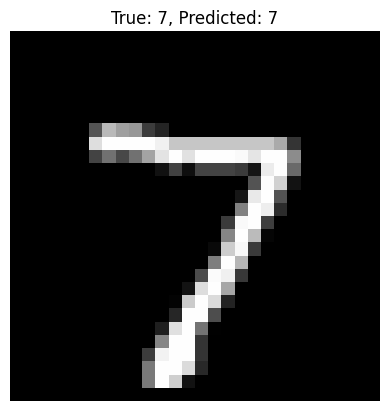

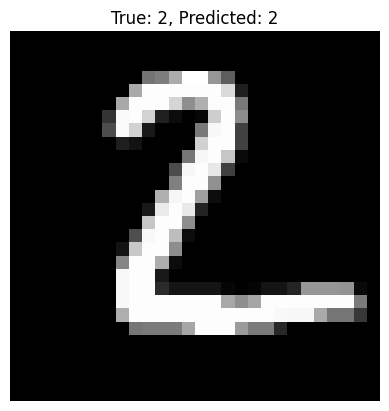

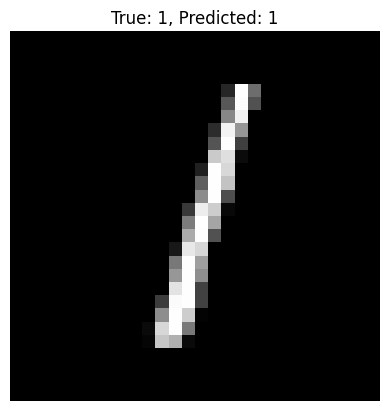

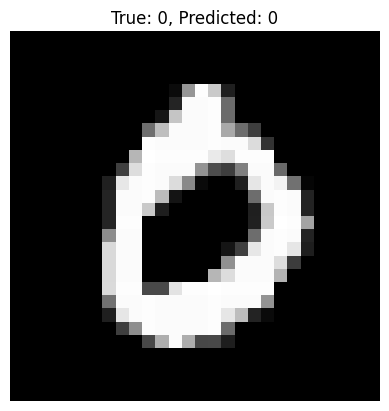

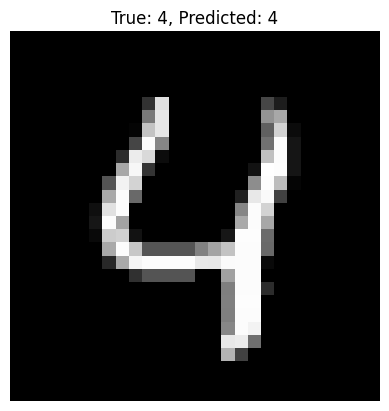

Predicted labels: [7 2 1 0 4]
True labels     : [7 2 1 0 4]


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt

# 1️⃣ Data Loading & Preprocessing
print("\n=== Step 1: Data Loading & Preprocessing ===")
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print("Training samples:", x_train.shape)
print("Testing samples:", x_test.shape)
print("Labels range:", y_train.min(), "to", y_train.max())
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
print("Sample pixel value after normalization:", x_train[0, 0, 0])

# 2️⃣ Model Building
print("\n=== Step 2: Model Building ===")
model = Sequential([
    Input(shape=(28, 28)),                 # Input: 28x28 image
    Flatten(),                             # Flatten -> 784
    Dense(1024, activation='relu'),        # Hidden Layer 1
    Dense(1024, activation='relu'),        # Hidden Layer 2
    Dense(512, activation='relu'),         # Hidden Layer 3
    Dense(10, activation='softmax')        # Output: 10 classes
])
model.summary()

# 3️⃣ Model Compilation & Training
print("\n=== Step 3: Compilation & Training ===")
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=5,               # increase epochs for better accuracy if needed
    batch_size=128,
    verbose=2
)
print("Training history keys:", history.history.keys())

# 4️⃣ Evaluation & Prediction
print("\n=== Step 4: Evaluation & Prediction ===")
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {acc:.4f}")

# 5️⃣ Visualize Predictions
print("\n=== Step 5: Visualize Predictions ===")
predictions = model.predict(x_test[:5])
for i in range(5):
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"True: {y_test[i]}, Predicted: {np.argmax(predictions[i])}")
    plt.axis('off')
    plt.show()
print("Predicted labels:", np.argmax(predictions, axis=1))
print("True labels     :", y_test[:5])


# Artificial Neural Networks (ANN)

## 1. Introduction
An **Artificial Neural Network (ANN)** is a computational model inspired by the way biological neural networks in the brain process information. It is used to solve complex problems like classification, regression, image recognition, and more.

### Key Concepts:
- **Neurons**: Basic units in an ANN, akin to biological neurons.
- **Layers**: ANNs are composed of layers—input, hidden, and output layers.
- **Weights & Biases**: Parameters that the model learns during training.
- **Activation Function**: A function applied to the neuron's output to determine the signal to be passed on.

## 2. Architecture of an ANN

### 2.1. Neurons
Each neuron receives inputs, processes them, and produces an output.

#### Neuron Model:
- Neurons receive inputs, each multiplied by a weight, and the sum is passed through an activation function to produce an output.

### 2.2. Layers
1. **Input Layer**: The layer where data enters the network.
2. **Hidden Layers**: Intermediate layers between input and output layers where computation happens.
3. **Output Layer**: The final layer that produces the model's prediction.

### 2.3. Types of Neural Networks
- **Feedforward Neural Networks**: Information flows from input to output.
- **Convolutional Neural Networks (CNNs)**: Used primarily for image data.
- **Recurrent Neural Networks (RNNs)**: Suitable for sequential data, such as time series or text.
  
## 3. Training an ANN

### 3.1. Forward Propagation
During forward propagation, the input is passed through the network layer by layer, and the output is generated.

### 3.2. Loss Function
A loss function measures the difference between the predicted and actual output.
- **Mean Squared Error (MSE)**: Common for regression tasks.
- **Cross-Entropy Loss**: Used for classification tasks.

### 3.3. Backpropagation
Backpropagation is an optimization technique used to minimize the loss by adjusting the weights and biases.
- The process involves calculating the gradient of the loss function with respect to each weight and updating them using an optimization algorithm (like **Gradient Descent**).

## 4. Activation Functions
Activation functions determine the output of a neural network's node (neuron). Some popular activation functions are:
- **Sigmoid**: Outputs values between 0 and 1, useful for binary classification.
- **ReLU (Rectified Linear Unit)**: Outputs zero for negative inputs and the input value for positive inputs.
- **Tanh**: Outputs values between -1 and 1.
- **Softmax**: Used in the output layer for multi-class classification, converts outputs to probabilities.

## 5. Optimization Techniques

### 5.1. Gradient Descent
Gradient Descent is the process of minimizing the loss function by updating the weights in the opposite direction of the gradient.
- **Batch Gradient Descent**: Updates weights after processing the entire dataset.
- **Stochastic Gradient Descent (SGD)**: Updates weights after processing each data point.
- **Mini-batch Gradient Descent**: A mix of both, updates weights after a subset of data.

### 5.2. Learning Rate
The learning rate determines how large the steps are during optimization. A learning rate that's too high can cause the model to miss the optimal solution, while a rate that's too low can make the training process slow.

### 5.3. Momentum
Momentum helps to accelerate gradient descent in the right direction, reducing oscillations and improving convergence speed.

### 5.4. Adam Optimizer
The **Adam optimizer** is a combination of **Momentum** and **RMSProp** and is one of the most popular optimization algorithms used in deep learning.

## 6. Overfitting and Regularization

### 6.1. Overfitting
Overfitting occurs when a model learns the noise and details from the training data to an extent that it negatively impacts the performance on new data (generalization).

### 6.2. Regularization Techniques
- **L2 Regularization**: Adds a penalty on the magnitude of weights to prevent them from growing too large.
- **Dropout**: Randomly "drops" (sets to zero) a subset of neurons during training to prevent overfitting.

## 7. Evaluation Metrics

- **Accuracy**: The proportion of correctly classified instances.
- **Precision & Recall**: Useful for imbalanced datasets.
- **F1-Score**: The harmonic mean of precision and recall.

## 8. Applications of ANN
- **Image Recognition**: CNNs excel in tasks like object detection and facial recognition.
- **Speech Recognition**: RNNs and LSTMs are popular for speech and language tasks.
- **Autonomous Vehicles**: Neural networks help in decision-making and object detection.
- **Healthcare**: Analyzing medical images, drug discovery, and disease prediction.
  
## 9. Challenges and Future Directions

- **Interpretability**: Neural networks are often referred to as “black boxes” because they are difficult to interpret.
- **Data Requirements**: Training deep networks requires large datasets.
- **Computational Resources**: Deep learning models are resource-intensive, requiring GPUs or TPUs for efficient training.

## 10. Conclusion
Artificial Neural Networks are powerful tools in the field of machine learning, and their ability to model complex patterns makes them applicable in a wide range of industries. As research in deep learning continues to advance, new techniques and architectures are being developed to address current challenges, pushing the boundaries of what is possible with machine learning.


#Advanced Image Output Code


=== Step 1: Data Loading & Preprocessing ===

=== Step 2: Simplified and Fast Model ===


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 8)      │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 8)      │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 28, 28, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 16)     │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 14, 14, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 7, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │        50,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 52,402 (204.70 KB)

 Trainable params: 52,226 (204.01 KB)

 Non-trainable params: 176 (704.00 B)


=== Step 3: Compile the Model ===

=== Step 4: Train the Model ===
Epoch 1/5
235/235 - 226s - 964ms/step - accuracy: 0.8605 - loss: 0.4971 - val_accuracy: 0.1630 - val_loss: 2.6477 - learning_rate: 1.0000e-03
Epoch 2/5
235/235 - 226s - 960ms/step - accuracy: 0.9581 - loss: 0.1521 - val_accuracy: 0.9235 - val_loss: 0.2629 - learning_rate: 1.0000e-03
Epoch 3/5
235/235 - 260s - 1s/step - accuracy: 0.9668 - loss: 0.1121 - val_accuracy: 0.9752 - val_loss: 0.0775 - learning_rate: 1.0000e-03
Epoch 4/5
235/235 - 260s - 1s/step - accuracy: 0.9727 - loss: 0.0918 - val_accuracy: 0.9842 - val_loss: 0.0498 - learning_rate: 1.0000e-03
Epoch 5/5
235/235 - 260s - 1s/step - accuracy: 0.9753 - loss: 0.0798 - val_accuracy: 0.9861 - val_loss: 0.0422 - learning_rate: 1.0000e-03

=== Step 5: Plot Results ===


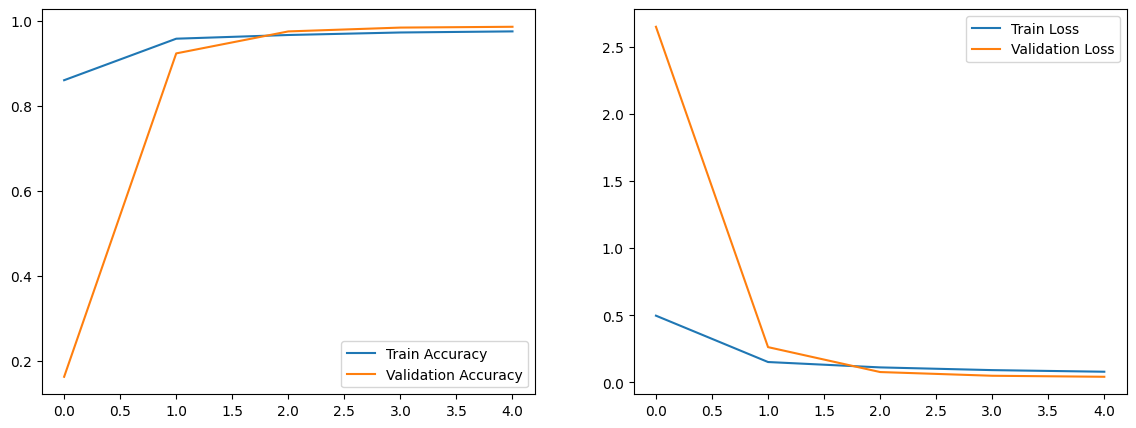


=== Step 6: Evaluate Model ===
Test Loss: 0.0422
Test Accuracy: 0.9861

=== Step 7: Confusion Matrix ===
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


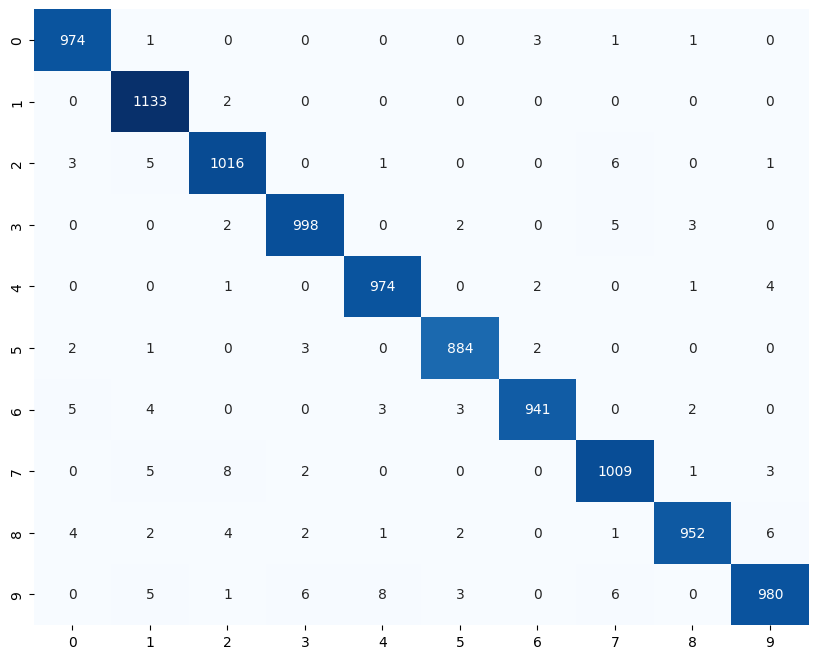


=== Step 8: Visualize Predictions ===
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


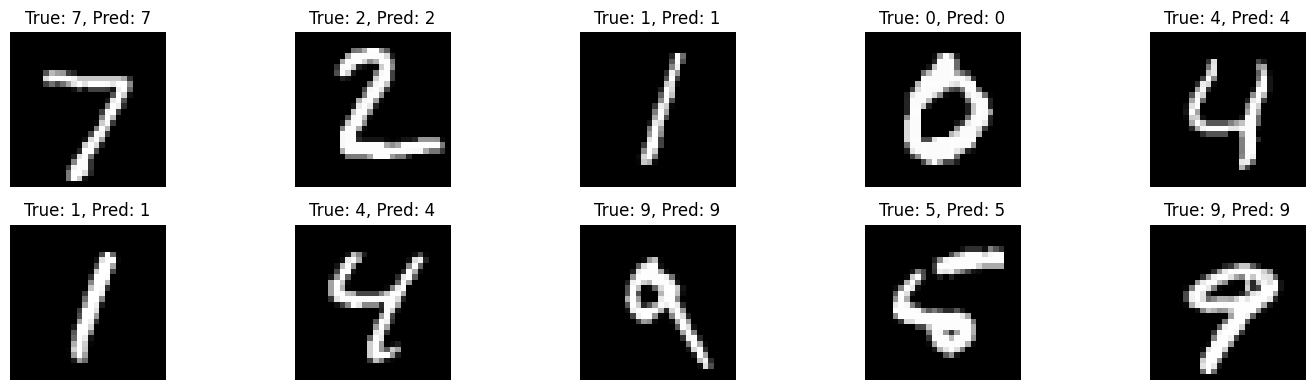

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Enable mixed precision for compatible GPUs
tf.keras.mixed_precision.set_global_policy('mixed_float16')

print("\n=== Step 1: Data Loading & Preprocessing ===")
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

print("\n=== Step 2: Simplified and Fast Model ===")
model = Sequential([
    Conv2D(8, (3,3), padding='same', use_bias=False, input_shape=(28,28,1)),
    BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    MaxPooling2D((2,2)),
    Dropout(0.1),

    Conv2D(16, (3,3), padding='same', use_bias=False),
    BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    MaxPooling2D((2,2)),
    Dropout(0.15),

    Flatten(),
    Dense(64, use_bias=False),
    BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    Dropout(0.2),

    Dense(10, activation='softmax', dtype='float32')  # float32 output for stability
])
model.summary()

print("\n=== Step 3: Compile the Model ===")
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

print("\n=== Step 4: Train the Model ===")
early_stopping = EarlyStopping(monitor='val_loss', patience=1, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=1, min_lr=1e-6)

history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=5,
    batch_size=256,      # Larger batch size to speedup GPU processing
    callbacks=[early_stopping, reduce_lr],
    verbose=2
)

print("\n=== Step 5: Plot Results ===")
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

print("\n=== Step 6: Evaluate Model ===")
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {acc:.4f}")

print("\n=== Step 7: Confusion Matrix ===")
y_pred = np.argmax(model.predict(x_test), axis=1)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.show()

print("\n=== Step 8: Visualize Predictions ===")
predictions = model.predict(x_test[:10])
plt.figure(figsize=(15,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_test[i].reshape(28,28), cmap='gray')
    plt.title(f"True: {y_test[i]}, Pred: {np.argmax(predictions[i])}")
    plt.axis('off')
plt.tight_layout()
plt.show()
